<a href="https://colab.research.google.com/github/CherutoSharleen/Data-Science-2/blob/main/BAC_Share_Prediction_using_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

#Feature Selection
from sklearn.feature_selection import SelectFromModel

#Split train and test data
from sklearn.model_selection import train_test_split

#For evaluation
#We will use mean absolute and r2 score(should be closer to 1)
from sklearn.metrics import mean_absolute_error, r2_score

#Visualizing the prediction vs tests
import matplotlib.pyplot as plt


## Loading Dataset

In [ ]:
# Load the dataset
df = pd.read_pickle('all_banks.pickle')

In [2]:
df.head()

Bank Ticker    BAC                                       C                \
Stock Info   Close   High    Low   Open      Volume  Close   High    Low   
Date                                                                       
2006-01-02   46.15  46.36  45.91  46.02         0.0  485.3  487.1  482.2   
2006-01-03   47.08  47.18  46.15  46.92  16197900.0  492.9  493.8  481.1   
2006-01-04   46.58  47.24  46.45  47.00  17427400.0  483.8  491.0  483.5   
2006-01-05   46.64  46.83  46.32  46.58  14668900.0  486.2  487.8  484.0   
2006-01-06   46.57  46.91  46.35  46.80  11965700.0  486.2  489.0  482.0   

Bank Ticker                    ...       MS                             \
Stock Info    Open     Volume  ...    Close     High      Low     Open   
Date                           ...                                       
2006-01-02   483.5        0.0  ...  47.1008  47.3333  46.7107  47.2751   
2006-01-03   490.0  1536700.0  ...  48.4041  48.5535  47.1008  47.4578   
2006-01-04   488.6  1852790.0  ...  48.4373  49.2093  48.4373  48.7278   
2006-01-05   484.4  1015470.0  ...  48.5701  48.6365  48.1634  48.6033   
2006-01-06   488.8  1358930.0  ...  48.6199  48.8524  48.1883  48.7860   

Bank Ticker                WFC                                      
Stock Info      Volume   Close    High     Low    Open      Volume  
Date                                                                
2006-01-02         0.0  31.415  31.535  31.215  31.415         0.0  
2006-01-03   6354408.0  31.900  31.975  31.195  31.600  11015000.0  
2006-01-04   9292188.0  31.530  31.820  31.365  31.800  10594000.0  
2006-01-05   6534262.0  31.495  31.555  31.310  31.500   9927600.0  
2006-01-06   8146445.0  31.680  31.775  31.385  31.580   8324000.0  

[5 rows x 30 columns]

## Selecting BAC Data Only.
<p> I wanted to try out the Random Forest Model


In [15]:
#Flatten columns
# X = df.drop(columns=[('BAC', 'Close'), ('C', 'Close')], axis=1)
# y = df.loc[:, [('BAC', 'Close'), ('C', 'Close')]].mean(axis=1)
BAC_data = df['BAC']
BAC_data.head()
X = BAC_data.drop(('Close'), axis=1)
y = BAC_data.loc[:, ('Close')]

X.head()

Stock Info,High,Low,Open,Volume
Date,,,,
2006-01-02,46.36,45.91,46.02,0.0
2006-01-03,47.18,46.15,46.92,16197900.0
2006-01-04,47.24,46.45,47.00,17427400.0
2006-01-05,46.83,46.32,46.58,14668900.0
2006-01-06,46.91,46.35,46.80,11965700.0


##Feature Selection
<p> Used the sklearn lib

In [11]:

# Train the model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

# Create a SelectFromModel object
sfm = SelectFromModel(rf, threshold=0.05)

# Fit the SelectFromModel object to the data
sfm.fit(X, y)



SelectFromModel(estimator=RandomForestRegressor(), threshold=0.05)

In [12]:
# Print the features that were selected
selected_features = X.columns[sfm.get_support()]
print(selected_features)


Index(['High', 'Low'], dtype='object', name='Stock Info')


In [14]:

# Print feature importance
importance = rf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.79568
Feature: 1, Score: 0.19840
Feature: 2, Score: 0.00585
Feature: 3, Score: 0.00006


## Split Train and Test Data


<p> I might remove volume and open juu zilirank low...idk

In [17]:


# Split the data into training and testing sets
# 80% train 20% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the RandomForestRegressor class
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [18]:
X_train.head()

Stock Info,High,Low,Open,Volume
Date,,,,
2016-04-14,14.28,13.7000,13.71,179357997.0
2006-02-01,44.24,43.8600,44.10,15794500.0
2012-08-14,7.90,7.7400,7.78,104643945.0
2009-12-22,15.44,15.3188,15.36,104061029.0
2012-03-02,8.21,8.0950,8.11,143887406.0


##Predictions and Evaluation

In [26]:
# Make predictions on the test data
y_pred = rf.predict(X_test)

In [20]:

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the r-squared score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error: ", mae)
print("R-squared score: ", r2)


Mean Absolute Error:  0.17166423136646045
R-squared score:  0.9995497344592209


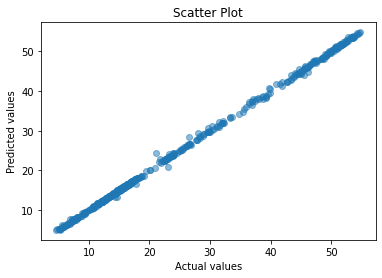

In [28]:
# Create a scatter plot of the predicted values vs the actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Scatter Plot')
plt.show()

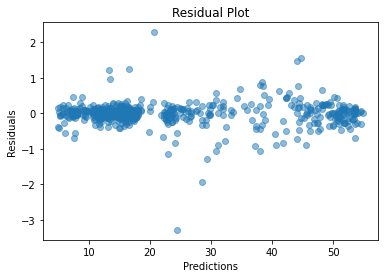

In [27]:
#Visualize the accuracy using a residual plot
# Residual difference in expected and prediction
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_test - y_pred

# Create a scatter plot of the residuals
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [24]:
#This cell is for predicting user entered data
#Predict User Entered Data
# Get user input
'''
open_price = float(input("Enter the opening price: "))
high_price = float(input("Enter the high price: "))
low_price = float(input("Enter the low price: "))
volume = float(input("Enter the volume: "))

# Create a new list containing the user input
new_data = [[open_price, high_price, low_price, volume]]

# Make a prediction using the trained model
predicted_price = rf.predict(new_data)
'''

'\nopen_price = float(input("Enter the opening price: "))\nhigh_price = float(input("Enter the high price: "))\nlow_price = float(input("Enter the low price: "))\nvolume = float(input("Enter the volume: "))\n\n# Create a new list containing the user input\nnew_data = [[open_price, high_price, low_price, volume]]\n\n# Make a prediction using the trained model\npredicted_price = rf.predict(new_data)\n'